<font size = 6> Load Lumapi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os

sys.path.append("C:\\Program Files\\Lumerical\\v202\\api\\python\\") #Default windows lumapi path
#sys.path.append("/opt/lumerical/v221/api/python/lumapi.py") #Default linux lumapi path
import lumapi

sys.path.append(os.path.dirname('C:\\Users\\andre\\Documents\\GitHub\\Photonics')) #Current directory

<font size = 6> Open Lumerical Mode

In [2]:
mmi = lumapi.MODE(filename = 'MMI.lms', hide = False)

<font size = 6> Parameters

In [160]:
Wm = 10e-6                                     #box width
L = 43.37e-6                                   #box length
h = 0.22e-6                                    #total height
Wg = 1.27e-6                                   #taper width
Tlen = 5e-6                                    #taper length
Tpos = [3.75e-6, 1.25e-6, -1.25e-6, -3.75e-6]  #taper position
material = 'Si (Silicon) - Palik'              #material
z = 3e-6                                       #ports z span
mcy = 250                                      #mesh cells y
mcz = 100                                      #mesh cells z

<font size = 6> MMI Assembly

In [73]:
mmi.switchtolayout()
mmi.selectall()
mmi.delete()

mmi.addrect()
mmi.set({
    'x min'         : 0,
    'x max'         : L,
    'y'             : 0,
    'y span'        : Wm,
    'z'             : 0,
    'z span'        : h,
    'material'      : material,
    'name'          : 'Box'
    })

mmi.addobject('linear_taper')
mmi.set({
    'x'             : -Tlen/2,
    'y'             : 0,
    'z'             : 0,
    'thickness'     : h,
    'angle_side'    : 90,
    'width_l'       : 0.45e-6,
    'width_r'       : Wg,
    'len'           : Tlen,
    'material'      : material,
    'name'          : 'Taper in'
})

mmi.addrect()
mmi.set({
    'x min'         : -2*Tlen,
    'x max'         : -Tlen,
    'y'             : 0,
    'y span'        : 0.45e-6,
    'z'             : 0,
    'z span'        : h,
    'material'      : material,
    'name'          : 'In'
})

for i in range (4):
    mmi.addobject('linear_taper')
    mmi.set({
        'x'             : L + Tlen/2,
        'y'             : Tpos[i],
        'z'             : 0,
        'thickness'     : h,
        'angle_side'    : 90,
        'width_l'       : Wg,
        'width_r'       : 0.45e-6,
        'len'           : Tlen,
        'material'      : material,
        'name'          : 'Taper out ' + str(i+1)
    })

for i in range (4):
    mmi.addrect()
    mmi.set({
        'x min'         : L + Tlen,
        'x max'         : L + 2*Tlen,
        'y'             : Tpos[i],
        'y span'        : 0.45e-6,
        'z'             : 0,
        'z span'        : h,
        'material'      : material,
        'name'          : 'Out ' + str(i+1)
    })

mmi.select('Taper in')
mmi.addtogroup('Input')
mmi.select('In')
mmi.addtogroup('Input')

mmi.select('Taper out 1')
mmi.addtogroup('Output 1')
mmi.select('Out 1')
mmi.addtogroup('Output 1')

mmi.select('Taper out 2')
mmi.addtogroup('Output 2')
mmi.select('Out 2')
mmi.addtogroup('Output 2')

mmi.select('Taper out 3')
mmi.addtogroup('Output 3')
mmi.select('Out 3')
mmi.addtogroup('Output 3')

mmi.select('Taper out 4')
mmi.addtogroup('Output 4')
mmi.select('Out 4')
mmi.addtogroup('Output 4')

for i in range(5):
    mmi.addmesh()
    if(i == 0):
        mmi.set({
            'based on a structure'          : 1,
            'structure'                     : 'Taper in',
            'set equivalent index'          : 1,
            'override x mesh'               : 0,
            'equivalent y index'            : 2,
            'equivalent z index'            : 4,
            'name'                          : 'mesh ' + str(i+1)
        })
    else:
        mmi.set({
            'based on a structure'          : 1,
            'structure'                     : 'Taper out ' + str(i),
            'set equivalent index'          : 1,
            'override x mesh'               : 0,
            'equivalent y index'            : 2,
            'equivalent z index'            : 4,
            'name'                          : 'mesh ' + str(i+1)
        })
mmi.addmesh()
mmi.set({
    'based on a structure'                  : 1,
    'structure'                             : 'Box',
    'set equivalent index'                  : 1,
    'override x mesh'                       : 0,
    'equivalent y index'                    : 2,
    'equivalent z index'                    : 4,
    'name'                                  : 'Box mesh'
})

mmi.addeme()
mmi.set({
    'allow custom eigensolver settings'     : 1,
    'display cells'                         : 1,
    'number of cell groups'                 : 3
})
mmi.set({
    'cells'                                 : np.transpose([10, 1, 10]),
    'subcell method'                        : np.transpose([1, 0, 1]),
    'modes'                                 : np.transpose([10, 100, 10]),
    'x min'                                 : -7.5e-6,
    'y'                                     : 0,
    'y span'                                : Wm + 4e-6,
    'z'                                     : 0,
    'z span'                                : z,
    'mesh cells y'                          : mcy,
    'mesh cells z'                          : mcz,
    'y min bc'                              : 'PML',
    'y max bc'                              : 'PML',
    'z min bc'                              : 'Symmetric',
    'z max bc'                              : 'PML'
})
mmi.set('background material', 'SiO2 (Glass) - Palik')
mmi.set('group spans', np.transpose([7.5e-6, L, 7.5e-6]))

mmi.select('EME::Ports::port_1')
mmi.set({
    'use full simulation span'              : 0,
    'y'                                     : 0,
    'y span'                                : 5e-6,
    'z'                                     : 0,
    'z span'                                : z,
})
mmi.select('EME::Ports::port_2')
mmi.delete()

for i in range(4):
    mmi.addemeport()
    mmi.set({
        'port location'                     : 'right',
        'use full simulation span'          : 0,
        'y'                                 : Tpos[i],
        'y span'                            : Wg + 1e-6,
        'z'                                 : 0,
        'z span'                            : z,
    })

mmi.addemeprofile()
mmi.set({
    'x min'                                 : -7.5e-6,
    'x max'                                 : L + 7.5e-6,
    'y'                                     : 0,
    'y span'                                : Wm + 4e-6,
    'z'                                     : 0,
})


<font size = 6> Simulation

In [8]:
mmi.run()
mmi.emepropagate()

<font size = 6> Field Profile

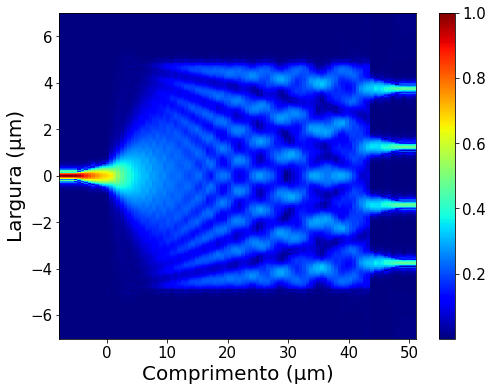

In [9]:
field = mmi.getresult('monitor', 'field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Comprimento (μm)',fontsize=20)
plt.ylabel('Largura (μm)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.savefig('Imagens/E linear.png')

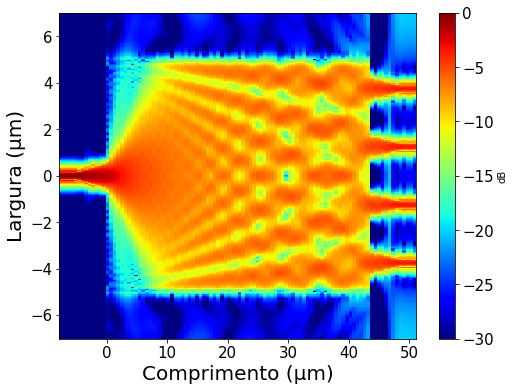

In [10]:
Elog = 10*np.log10(E)
plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet',vmin=-30)
plt.xlabel('Comprimento (μm)',fontsize=20)
plt.ylabel('Largura (μm)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=15)
plt.savefig('Imagens/E Log.png')

<font size = 6>Wavelength Sweep

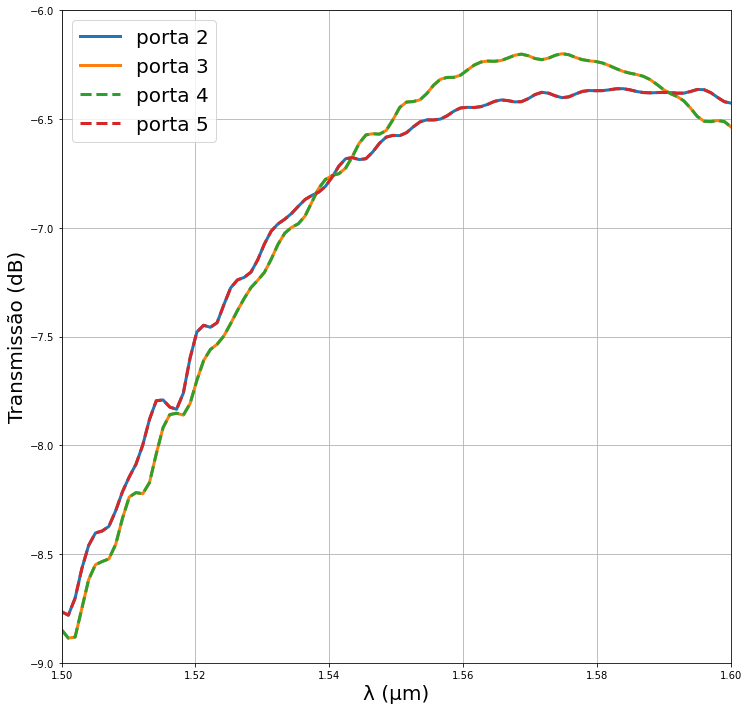

In [11]:
mmi.setemeanalysis('wavelength sweep', 1)
mmi.setemeanalysis('start wavelength', 1.5e-6)
mmi.setemeanalysis('stop wavelength', 1.6e-6)
mmi.setemeanalysis('number of wavelength points', 100)

mmi.emesweep('wavelength sweep')

wave = mmi.getemesweep('S_wavelength_sweep')

lmbd = wave['wavelength']*1e6

s21 = abs(wave['s21'])**2
s31 = abs(wave['s31'])**2
s41 = abs(wave['s41'])**2
s51 = abs(wave['s51'])**2

plt.figure(figsize = (12,12))
plt.plot(lmbd, 10*np.log10(s21), linewidth = 3, label = 'porta 2')
plt.plot(lmbd, 10*np.log10(s31), linewidth = 3, label = 'porta 3')
plt.plot(lmbd, 10*np.log10(s41), '--', linewidth = 3, label = 'porta 4')
plt.plot(lmbd, 10*np.log10(s51), '--', linewidth = 3, label = 'porta 5')
plt.xlabel('λ (μm)', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(1.5, 1.6)
plt.ylim(-9, -6)
plt.legend(fontsize = 20)
plt.grid(True)
plt.savefig('Imagens/Wavelength sweep.png')

<font size = 6>Mode Sweep

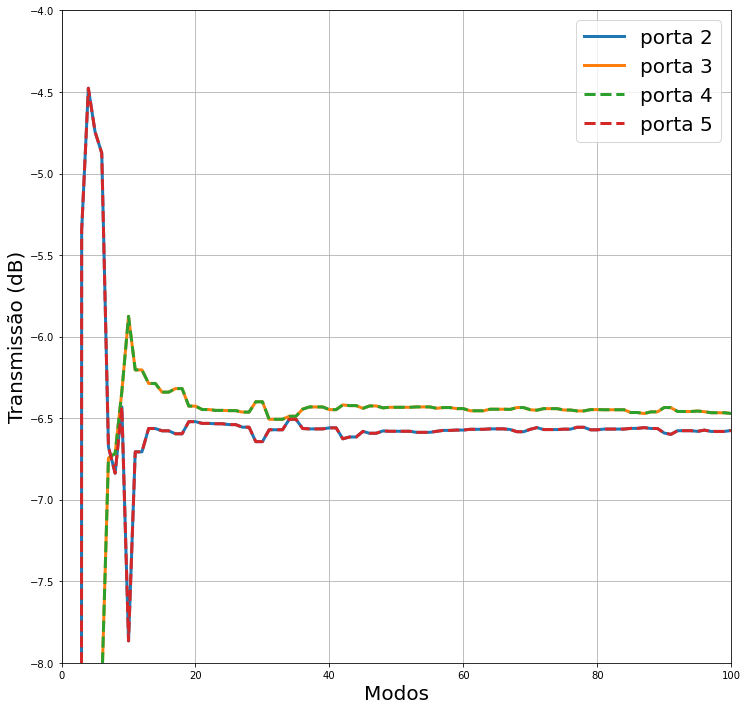

In [15]:
mmi.setemeanalysis('Mode convergence sweep', 1)
mmi.setemeanalysis('start mode', 1)
mmi.setemeanalysis('mode interval', 1)

mmi.emesweep('mode convergence sweep')

mode = mmi.getemesweep('S_mode_convergence_sweep')
x = mode['modes']

s21 = abs(mode['s21'])**2
s31 = abs(mode['s31'])**2
s41 = abs(mode['s41'])**2
s51 = abs(mode['s51'])**2

plt.figure(figsize = (12,12))
plt.plot(x, 10*np.log10(s21), linewidth = 3, label = 'porta 2')
plt.plot(x, 10*np.log10(s31), linewidth = 3, label = 'porta 3')
plt.plot(x, 10*np.log10(s41), '--', linewidth = 3, label = 'porta 4')
plt.plot(x, 10*np.log10(s51), '--', linewidth = 3, label = 'porta 5')
plt.xlabel('Modos', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(0, 100)
plt.ylim(-8, -4)
plt.legend(fontsize = 20)
plt.grid(True)
plt.savefig('Imagens/Mode sweep.png')

<font size = 6>Propagation sweep

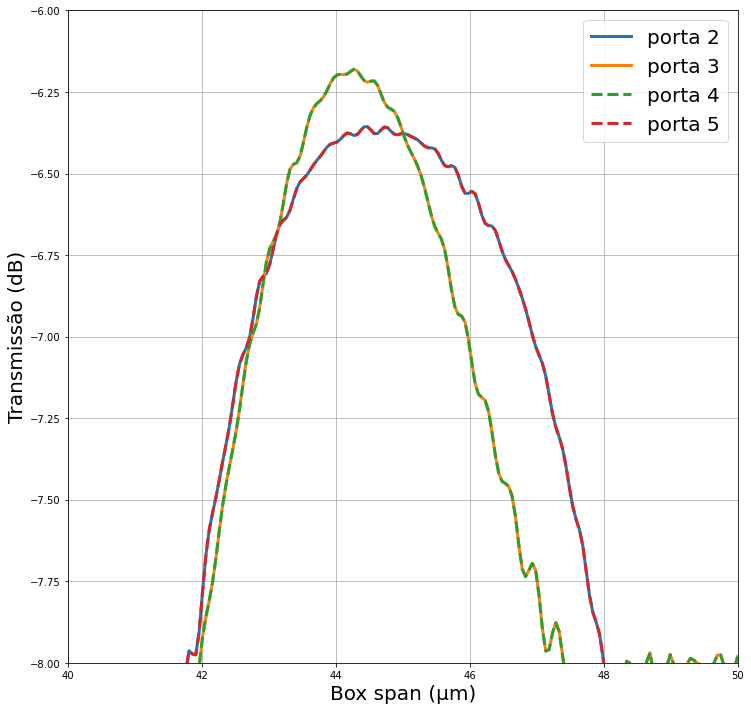

In [16]:
mmi.setemeanalysis('Propagation sweep', 1)
mmi.setemeanalysis('parameter', 'group span 2')
mmi.setemeanalysis('start', 40e-6)
mmi.setemeanalysis('stop', 50e-6)
mmi.setemeanalysis('number of points', 200)

mmi.emesweep()

S = mmi.getemesweep('S')
span = S['group_span_2']*1e6

s21 = abs(S['s21'])**2
s31 = abs(S['s31'])**2
s41 = abs(S['s41'])**2
s51 = abs(S['s51'])**2

plt.figure(figsize = (12,12))
plt.plot(span, 10*np.log10(s21), linewidth = 3, label = 'porta 2')
plt.plot(span, 10*np.log10(s31), linewidth = 3, label = 'porta 3')
plt.plot(span, 10*np.log10(s41), '--', linewidth = 3, label = 'porta 4')
plt.plot(span, 10*np.log10(s51), '--', linewidth = 3, label = 'porta 5')
plt.xlabel('Box span (μm)', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(40, 50)
plt.ylim(-8, -6)
plt.legend(fontsize = 20)
plt.grid(True)
plt.savefig('Imagens/Propagation sweep.png')

<font size = 6>User S Matrix

,1,2,3,4,5
1,-46.537795,-6.568503,-6.479621,-6.479607,-6.568465
2,-6.575691,-24.470004,-25.726621,-29.298854,-27.409892
3,-6.471187,-27.084001,-28.497759,-32.805627,-27.615220
4,-6.471172,-27.615221,-32.805637,-28.497781,-27.084031
5,-6.575652,-27.409888,-29.298857,-25.726647,-24.470056


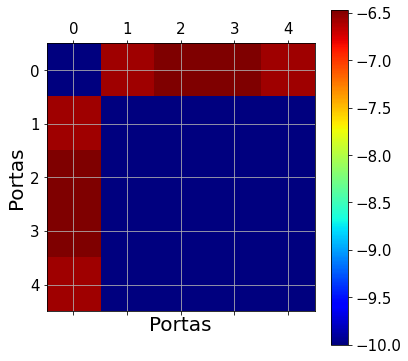

In [19]:
mmi.setemeanalysis('group spans', np.transpose([7.5e-6, L, 7.5e-6]))
mmi.emepropagate()
smatrix = 10*np.log10(abs(mmi.getresult('EME', 'user s matrix'))**2)

plt.matshow(smatrix,cmap = 'jet',vmin=-10)
plt.xlabel('Portas',fontsize=20)
plt.ylabel('Portas',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.grid()
plt.savefig('Imagens/MatrizS')

lin = [1, 2, 3, 4, 5]
col = [1, 2, 3, 4, 5]
df = pd.DataFrame(smatrix, index = lin, columns = col)
df

<font size = 6>Optimized span sweeps

In [20]:
mmi.setemeanalysis('group spans', np.transpose([7.5e-6, 44.3216e-6, 7.5e-6]))
mmi.emepropagate()

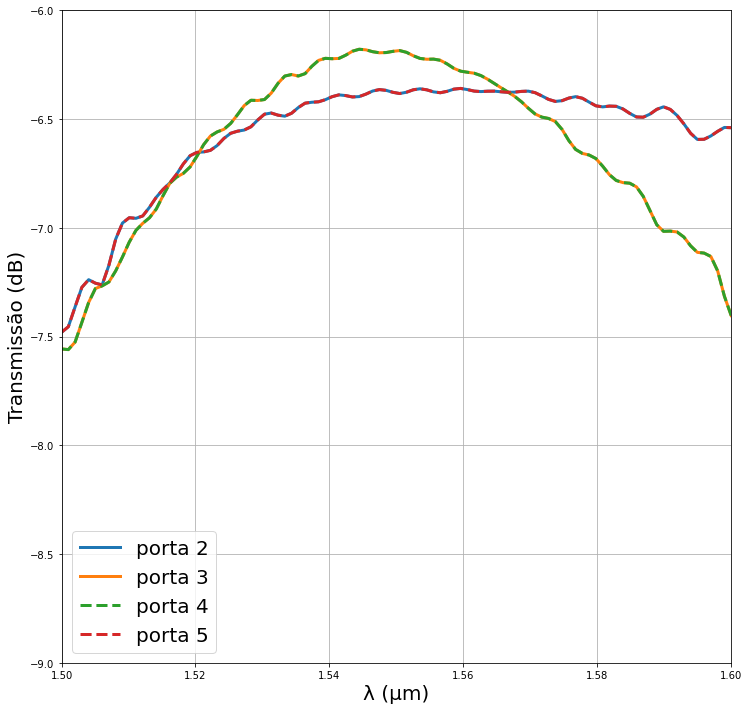

In [21]:
mmi.setemeanalysis('wavelength sweep', 1)
mmi.setemeanalysis('start wavelength', 1.5e-6)
mmi.setemeanalysis('stop wavelength', 1.6e-6)
mmi.setemeanalysis('number of wavelength points', 100)

mmi.emesweep('wavelength sweep')

wave = mmi.getemesweep('S_wavelength_sweep')

lmbd = wave['wavelength']*1e6

s21 = abs(wave['s21'])**2
s31 = abs(wave['s31'])**2
s41 = abs(wave['s41'])**2
s51 = abs(wave['s51'])**2

plt.figure(figsize = (12,12))
plt.plot(lmbd, 10*np.log10(s21), linewidth = 3, label = 'porta 2')
plt.plot(lmbd, 10*np.log10(s31), linewidth = 3, label = 'porta 3')
plt.plot(lmbd, 10*np.log10(s41), '--', linewidth = 3, label = 'porta 4')
plt.plot(lmbd, 10*np.log10(s51), '--', linewidth = 3, label = 'porta 5')
plt.xlabel('λ (μm)', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(1.5, 1.6)
plt.ylim(-9, -6)
plt.legend(fontsize = 20)
plt.grid(True)
plt.savefig('Imagens/Wavelength sweep ot.png')

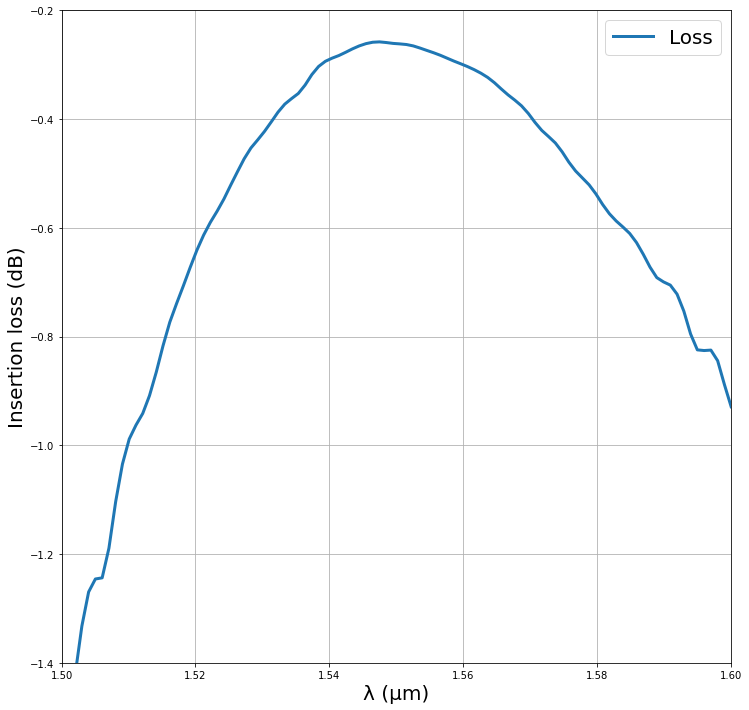

In [22]:
loss = 10*np.log10(s21 + s31 + s41 + s51)

plt.figure(figsize = (12,12))
plt.plot(lmbd, loss, linewidth = 3, label = 'Loss')
plt.xlabel('λ (μm)', fontsize = 20)
plt.ylabel('Insertion loss (dB)', fontsize = 20)
plt.xlim(1.5, 1.6)
plt.ylim(-1.4, -0.2)
plt.legend(fontsize = 20)
plt.grid(True)
plt.savefig('Imagens/Insertion loss.png')

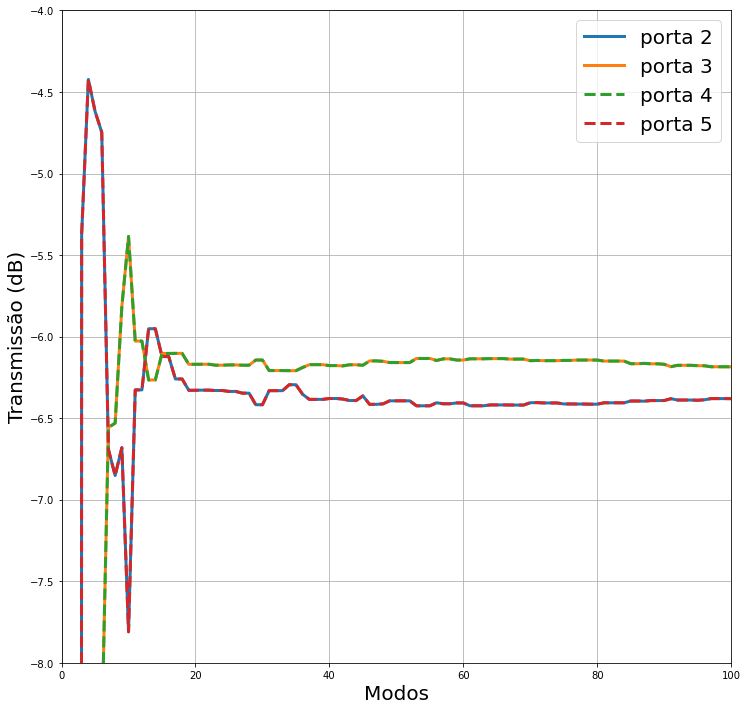

In [24]:
mmi.setemeanalysis('Mode convergence sweep', 1)
mmi.setemeanalysis('start mode', 1)
mmi.setemeanalysis('mode interval', 1)

mmi.emesweep('mode convergence sweep')

mode = mmi.getemesweep('S_mode_convergence_sweep')
x = mode['modes']

s21 = abs(mode['s21'])**2
s31 = abs(mode['s31'])**2
s41 = abs(mode['s41'])**2
s51 = abs(mode['s51'])**2

plt.figure(figsize = (12,12))
plt.plot(x, 10*np.log10(s21), linewidth = 3, label = 'porta 2')
plt.plot(x, 10*np.log10(s31), linewidth = 3, label = 'porta 3')
plt.plot(x, 10*np.log10(s41), '--', linewidth = 3, label = 'porta 4')
plt.plot(x, 10*np.log10(s51), '--', linewidth = 3, label = 'porta 5')
plt.xlabel('Modos', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(0, 100)
plt.ylim(-8, -4)
plt.legend(fontsize = 20)
plt.grid(True)
plt.savefig('Imagens/Mode sweep ot.png')

,1,2,3,4,5
1,-57.355291,-6.384266,-6.193673,-6.193659,-6.384227
2,-6.380365,-25.603491,-26.377967,-29.755014,-28.783095
3,-6.185179,-28.319935,-27.359368,-29.569879,-27.950569
4,-6.185165,-27.950557,-29.569889,-27.359390,-28.319978
5,-6.380325,-28.783090,-29.755029,-26.378002,-25.603548


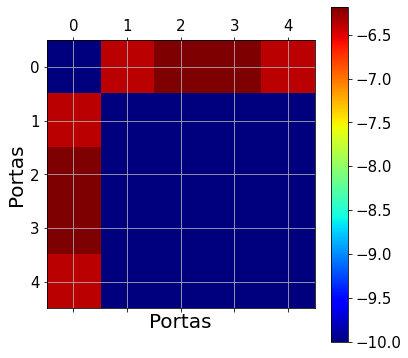

In [25]:
smatrix = 10*np.log10(abs(mmi.getresult('EME', 'user s matrix'))**2)

plt.matshow(smatrix,cmap = 'jet',vmin=-10)
plt.xlabel('Portas',fontsize=20)
plt.ylabel('Portas',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.grid()
plt.savefig('Imagens/MatrizS ot')

lin = [1, 2, 3, 4, 5]
col = [1, 2, 3, 4, 5]
df = pd.DataFrame(smatrix, index = lin, columns = col)
df

<font size= 8>Parameter sweeps

<font size = 6>Box width sweep

In [74]:
nr = 3.476
nc = 1.444
n = 10
wm = np.linspace(9.8e-6, 10.2e-6, n)
lmbd = 1.55e-6
c0 = 299792458
k0 = 2*np.pi/lmbd
N = 4
delta = 0
we = wm + (lmbd/np.pi) * ((nc/nr)**(2*delta)) * ((nr**2 - nc**2)**(-0.5))
Lpi = nr*(we**2/lmbd)
L = 0.75*(Lpi/N)

s21 = np.zeros([10,n])
s31 = np.zeros([10,n])
s41 = np.zeros([10,n])
s51 = np.zeros([10,n])

In [75]:
for i in range(n):
    mmi.switchtolayout()

    mmi.setnamed('Box', 'y span', wm[i])
    mmi.setnamed('EME', 'y span', wm[i] + 2e-6)
    mmi.setnamed('Box', 'x max', L[i])
    mmi.setnamed('EME', 'group spans', np.transpose([7.5e-6, L[i], 7.5e-6]))
    mmi.setnamed('monitor', 'x max', L[i] + 3*Tlen/2)
    mmi.setnamed('monitor', 'y span', wm[i] + 4e-6)
    mmi.setnamed('Output 1::Taper out 1', 'x', L[i] + Tlen/2)
    mmi.setnamed('Output 1::Taper out 1', 'y', 3*wm[i]/8)
    mmi.setnamed('Output 1::Out 1', 'x', L[i] + 3*Tlen/2)
    mmi.setnamed('Output 1::Out 1', 'y', 3*wm[i]/8)
    mmi.setnamed('Output 2::Taper out 2', 'x', L[i] + Tlen/2)
    mmi.setnamed('Output 2::Taper out 2', 'y', wm[i]/8)
    mmi.setnamed('Output 2::Out 2', 'x', L[i] + 3*Tlen/2)
    mmi.setnamed('Output 2::Out 2', 'y', wm[i]/8)
    mmi.setnamed('Output 3::Taper out 3', 'x', L[i] + Tlen/2)
    mmi.setnamed('Output 3::Taper out 3', 'y', -wm[i]/8)
    mmi.setnamed('Output 3::Out 3', 'x', L[i] + 3*Tlen/2)
    mmi.setnamed('Output 3::Out 3', 'y', -wm[i]/8)
    mmi.setnamed('Output 4::Taper out 4', 'x', L[i] + Tlen/2)
    mmi.setnamed('Output 4::Taper out 4', 'y', -3*wm[i]/8)
    mmi.setnamed('Output 4::Out 4', 'x', L[i] + 3*Tlen/2)
    mmi.setnamed('Output 4::Out 4', 'y', -3*wm[i]/8)
    mmi.setnamed('EME::Ports::port_2', 'y', 3*wm[i]/8)
    mmi.setnamed('EME::Ports::port_3', 'y', wm[i]/8)
    mmi.setnamed('EME::Ports::port_4', 'y', -wm[i]/8)
    mmi.setnamed('EME::Ports::port_5', 'y', -3*wm[i]/8)
    
    mmi.run()
    mmi.emepropagate()

    mmi.setemeanalysis('wavelength sweep', 1)
    mmi.setemeanalysis('start wavelength', 1.54e-6)
    mmi.setemeanalysis('stop wavelength', 1.56e-6)
    mmi.setemeanalysis('number of wavelength points', 10)

    mmi.emesweep('wavelength sweep')

    wave = mmi.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2
    s51[:,i] = abs(wave['s51'])**2

    print('Completed = {}/{}'.format(i+1,n))

Completed = 1/10
Completed = 2/10
Completed = 3/10
Completed = 4/10
Completed = 5/10
Completed = 6/10
Completed = 7/10
Completed = 8/10
Completed = 9/10
Completed = 10/10


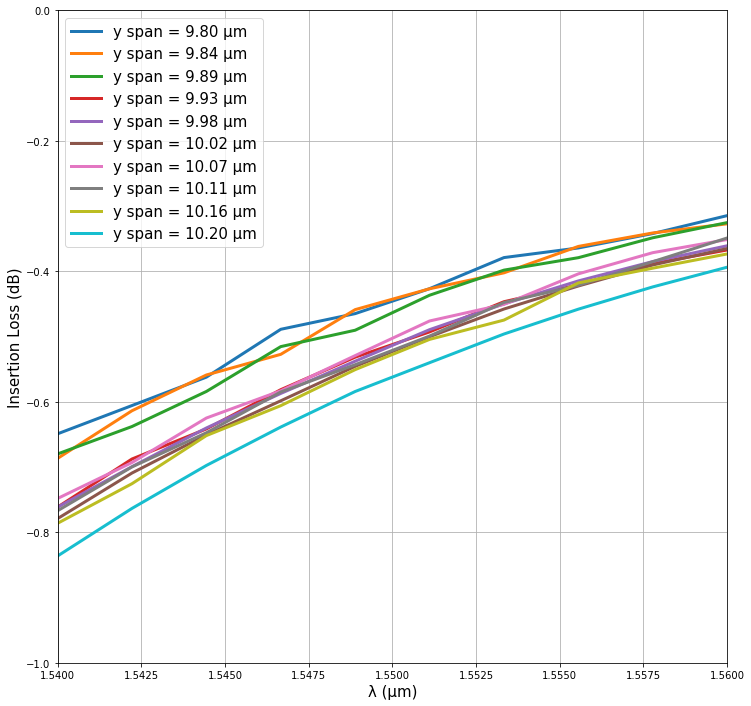

<Figure size 432x288 with 0 Axes>

In [95]:
loss = 10*np.log10(s21 + s31 + s41 + s51)
plt.figure(figsize = (12,12))
for i in range(10):
    plt.plot(lmbd, loss[:,i], label = 'y span = {:.2f} μm'.format(wm[i]*1e6,3), linewidth = 3)
plt.xlim(1.54, 1.56)
plt.ylim(-1, 0)
plt.xlabel('λ (μm)', fontsize = 15)
plt.ylabel('Insertion Loss (dB)', fontsize = 15)
plt.grid(True)
plt.legend(loc ='upper left', fontsize = 15)
plt.show()
plt.savefig('Imagens/Loss x Box span')

<font size = 6>Taper width sweep

In [143]:
n = 10
Wg = np.linspace(1.2e-6, 1.3e-6, n)

s21 = np.zeros([10,n])
s31 = np.zeros([10,n])
s41 = np.zeros([10,n])
s51 = np.zeros([10,n])

In [144]:
for i in range(n):
    mmi.switchtolayout()
    
    mmi.setnamed('Input::Taper in', 'width_r', Wg[i])
    mmi.setnamed('Output 1::Taper out 1', 'width_l', Wg[i])
    mmi.setnamed('Output 2::Taper out 2', 'width_l', Wg[i])
    mmi.setnamed('Output 3::Taper out 3', 'width_l', Wg[i])
    mmi.setnamed('Output 4::Taper out 4', 'width_l', Wg[i])

    mmi.run()
    mmi.emepropagate()

    mmi.setemeanalysis('wavelength sweep', 1)
    mmi.setemeanalysis('start wavelength', 1.54e-6)
    mmi.setemeanalysis('stop wavelength', 1.56e-6)
    mmi.setemeanalysis('number of wavelength points', 10)

    mmi.emesweep('wavelength sweep')

    wave = mmi.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2
    s51[:,i] = abs(wave['s51'])**2

    print('Completed = {}/{}'.format(i+1,n))

Completed = 1/10
Completed = 2/10
Completed = 3/10
Completed = 4/10
Completed = 5/10
Completed = 6/10
Completed = 7/10
Completed = 8/10
Completed = 9/10
Completed = 10/10


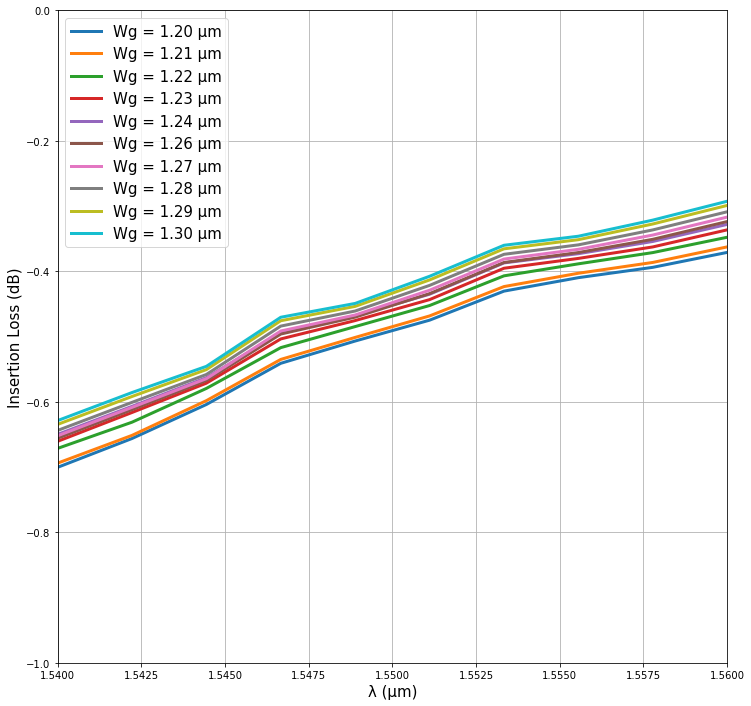

<Figure size 432x288 with 0 Axes>

In [146]:
loss = 10*np.log10(s21 + s31 + s41 + s51)
plt.figure(figsize = (12,12))
for i in range(10):
    plt.plot(lmbd, loss[:,i], label = 'Wg = {:.2f} μm'.format(Wg[i]*1e6,3), linewidth = 3)
plt.xlim(1.54, 1.56)
plt.ylim(-1, 0)
plt.xlabel('λ (μm)', fontsize = 15)
plt.ylabel('Insertion Loss (dB)', fontsize = 15)
plt.grid(True)
plt.legend(loc ='upper left', fontsize = 15)
plt.show()
plt.savefig('Imagens/Loss x Taper width span')